<a href="https://colab.research.google.com/github/josegabrielguerrero26/CSE450-machinelearning/blob/main/Class_Study_Session_M04_%26_M05_(3_5_2024)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 04 Review

1. Dicussion on general topics
2. Neural Network Definitions and Overview
3. Neural Network Code Walk-through


## 1. Discussion on General Topics

**Class Github:** https://byui-cse.github.io/cse450-course/

**Holdout Set Predictions**
*  Holdout set preditions can be submitted early and resubmitted mulitple times.
*  Use the Mini Holdout set and the corresponding notebook to understand performance and to get an idea of how well you will perform on the holdout set.

**Model evaluation options for Continuous Targets:**

* *Mean squared error (MSE):* captures the average differences between the expected values and predicted values. The smaller the value the better the performance. Be careful because this is relative and domain specific.

* *Root mean squared error (RMSE):* is the square root of MSE. It provides the same information but in the same units as the target values. Smaller values indicate better performance. Be careful because this is relative and domain specific. RMSE overemphasizes large differences. In other words, if the data you are measuring against has a lot of outliers then RMSE will be larger. RMSE is most effective when the data is not expected to have a lot of outliers.

* *Mean absolute error (MAE):*  also captures average differences but in a linear way. Not influenced by large or small differences. Represented in the target value units. MAE is most effective when outliers are expected.  Also relative and domain specific.

* *R-squared coefficient (R2):* Ranges from 0 to 1. The closer the value is to 1 the better the performance of the model. R2 shows how well your model explains the variance in the target variable. For example if R2 is .70 that means your model explained 70% of the variance in the target values. This metric is not relative or domain specific.


## 2. Neural Network Definitions and Overview



[Keras Library](https://www.tensorflow.org/tutorials) is part of the Google Tensorflow Library

**Neuron:** a distinct unit within a neural network. Nuerons accept inputs from the neurons in the preceding layer. All neurons from one layer to the next are connected to each other.  

**Wieghts:** each nueron connection has a weight value. This value is determined in the training process.

**Bias:** each nueron has a bias value. This value is determined in the training process.

**Activation Function:** is the function that mathematically decides wether a nueron should be activated or not. If a nueron is activated it passes information to the next layer.

**Epochs:** a pass of the entire training set.

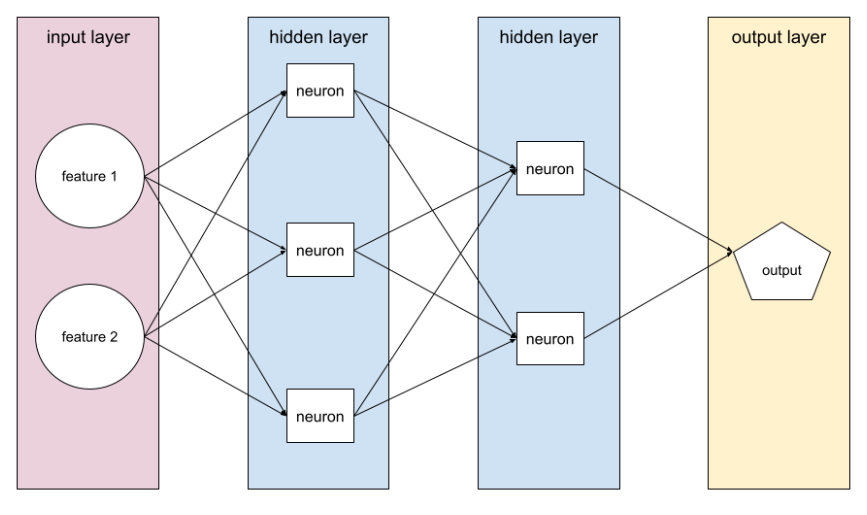


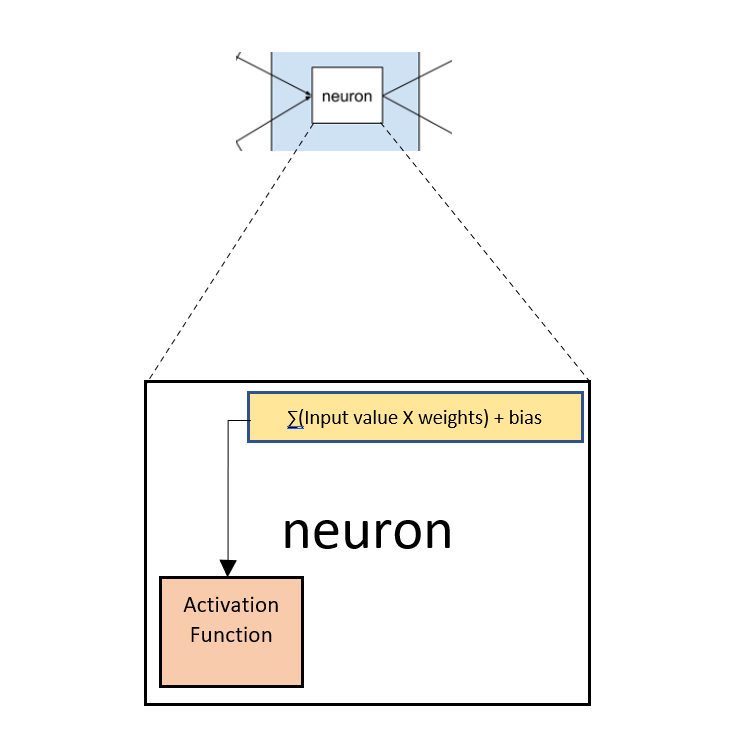


1. Data is fed into the neural network as input information.

2. Weights and bias are configured in the hidden layer.

3. Neurons run mathematical calculations (Activation functions) to figure out whether to pass information on to the next neuron in the hidden layer.

4. The network attempts to do this over and over, each time strengthening the connections that lead to success and diminishing those that lead to failure.

5. Once the network has optimized it produces predictions as the output from the hidden layer.

6. Building the neural network requires configuring the layers of the model, then compiling the model.


## 3. Neural Network Code Walk-through

**Process to code out a Neural Network:**

1. **Build**
2. **Compile**
3. **Fit**
4. **Predict**





In [ ]:
# Import Libraries and dependencies
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [ ]:
# Import data
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
X_holdout = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv")
bikes.head()

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
0,1/1/2011,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0
1,1/1/2011,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0
2,1/1/2011,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0
3,1/1/2011,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0
4,1/1/2011,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0


In [ ]:
bikes.tail()

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
112482,10/31/2023,19.0,241,594,10.2,10.2,0.4516,8.4,2,4,0,1
112483,10/31/2023,20.0,171,450,8.9,7.5,0.5268,9.3,1,4,0,1
112484,10/31/2023,21.0,176,402,7.7,6.4,0.5756,7.8,1,4,0,1
112485,10/31/2023,22.0,106,257,8.0,8.0,0.5604,0.0,1,4,0,1
112486,10/31/2023,23.0,78,135,6.5,6.5,0.6401,4.5,1,4,0,1


In [ ]:
bikes.isna().sum()

dteday           0
hr              13
casual           0
registered       0
temp_c           0
feels_like_c     0
hum              0
windspeed        0
weathersit       0
season           0
holiday          0
workingday       0
dtype: int64

In [ ]:
# drop nulls
bikes.dropna(inplace=True)

In [ ]:
# Create a function to preprocess data
def preprocessing(df):

  # date information
  df['datetime'] = pd.to_datetime(df.dteday)
  df['year'] = df.datetime.dt.year
  df['month'] = df.datetime.dt.month
  df['day'] = df.datetime.dt.day
  df['dayofweek'] = df.datetime.dt.dayofweek
  df['dayofyear'] = df.datetime.dt.dayofyear

  # time since company start
  df['monthsince'] = (df.year-2011)*12+df.month
  df['daysince'] = (df.year-2011)*365+df.datetime.dt.dayofyear

  # holiday information
  df['majorholiday'] = 0
  # Thanksgiving
  df.loc[(df['month']==11) & (df['day']==24) & (df['year']==2011),'majorholiday'] = 1
  df.loc[(df['month']==11) & (df['day']==22) & (df['year']==2012),'majorholiday'] = 1
  # Christmas
  df.loc[(df['month']==12) & (df['day']==24),'majorholiday'] = 1
  df.loc[(df['month']==12) & (df['day']==25),'majorholiday'] = 1
  # New Years
  df.loc[(df['month']==1) & (df['day']==1),'majorholiday'] = 1
  df.loc[(df['month']==12) & (df['day']==31),'majorholiday'] = 1
  # 4th of July
  df.loc[(df['month']==7) & (df['day']==4),'majorholiday'] = 1

  # rename seasons
  df['season'] = df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4:'Fall'})

  # feature engineering creating dew point
  df['dewpoint'] = (df['temp_c']-((100-(100*df['hum']))/5))*(9/5)+32

  # one-hot encoding
  df['hr']=df['hr'].astype(int)


  df = pd.get_dummies(df, columns=['season', 'hr', 'month','day','weathersit'], drop_first=False)

  # drops
  df.drop(columns=['dteday'],inplace=True)
  df.drop(columns=['datetime'],inplace=True)

  return df

In [ ]:
# Preprocessing
bikes = preprocessing(bikes)
X_holdout = preprocessing(X_holdout)

In [ ]:
# Additional Preprocessing for holdout set
X_holdout['season_Spring'] = 0
X_holdout['season_Summer'] = 0
X_holdout['month_1'] = 0
X_holdout['month_2'] = 0
X_holdout['month_3'] = 0
X_holdout['month_4'] = 0
X_holdout['month_5'] = 0
X_holdout['month_6'] = 0
X_holdout['month_7'] = 0
X_holdout['month_8'] = 0
X_holdout['month_9'] = 0
X_holdout['month_10'] = 0
X_holdout['month_11'] = 0

In [ ]:
# View dfs info
bikes.info(),X_holdout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112474 entries, 0 to 112486
Data columns (total 90 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   casual         112474 non-null  int64  
 1   registered     112474 non-null  int64  
 2   temp_c         112474 non-null  float64
 3   feels_like_c   112474 non-null  float64
 4   hum            112474 non-null  float64
 5   windspeed      112474 non-null  float64
 6   holiday        112474 non-null  int64  
 7   workingday     112474 non-null  int64  
 8   year           112474 non-null  int64  
 9   dayofweek      112474 non-null  int64  
 10  dayofyear      112474 non-null  int64  
 11  monthsince     112474 non-null  int64  
 12  daysince       112474 non-null  int64  
 13  majorholiday   112474 non-null  int64  
 14  dewpoint       112474 non-null  float64
 15  season_Fall    112474 non-null  uint8  
 16  season_Spring  112474 non-null  uint8  
 17  season_Summer  112474 non-nul

(None, None)

In [ ]:
# combine casual and registered rentals
bikes['totalrented'] = bikes['casual']+bikes['registered']
bikes.drop(columns=['casual','registered'], inplace=True)

# pull out a validation set (November 2011)
X_val = bikes[(bikes['month_10']==1) & (bikes['year']==2023)]
X_train = bikes[(bikes['year']==2022) | (bikes['year']==2023)]

# split features and target(s)
y_train = X_train[['totalrented']]
X_train = X_train.drop(columns=['totalrented'])
y_val = X_val[['totalrented']]
X_val = X_val.drop(columns=['totalrented'])

# pull out a testing set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.05, random_state=0)

In [ ]:
# Sort columns
X_train = X_train[sorted(X_train.columns)]
X_val = X_val[sorted(X_val.columns)]
X_test = X_test[sorted(X_test.columns)]
X_holdout = X_holdout[sorted(X_holdout.columns)]

In [ ]:
# Normalize data by fitting scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform data
X_train = norm.transform(X_train)
X_val = norm.transform(X_val)
X_test = norm.transform(X_test)
X_holdout = norm.transform(X_holdout)

X_train, X_val, X_test, X_holdout

(array([[0.        , 0.        , 0.        , ..., 0.19546248, 1.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.22862129, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.31413613, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.27923211, 1.        ,
         1.        ],
        [0.        , 0.        , 0.        , ..., 0.008726  , 1.        ,
         1.        ],
        [0.        , 0.        , 0.        , ..., 0.2495637 , 0.        ,
         0.        ]]),
 array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [1.        , 0.        , 0.        , ..., 0.008726  , 0.        ,
         1.        ],
        [1.        , 0.        , 0.        , ..., 0.0122164 , 0.        ,
         1.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.13612565, 1.        ,
         1.        ],
        [0. 

In [ ]:
# Confirm shapes of each X data set
X_train.shape, X_val.shape, X_test.shape, X_holdout.shape

((15252, 88), (744, 88), (803, 88), (1465, 88))

In [ ]:
# Confirm shapes of each y data set
y_train.shape, y_val.shape, y_test.shape

((15252, 1), (744, 1), (803, 1))

In [ ]:
# Nomilization layer configuration
normalizer = layers.Normalization()
normalizer.adapt(X_train)

In [ ]:
# Build NN
model = models.Sequential(normalizer)

model.add(layers.Dense(150,activation='relu', input_shape=[len(X_train[0])]))
model.add(layers.Dropout(.3))
model.add(layers.Dense(280, activation='relu'))
model.add(layers.Dropout(.3))
model.add(layers.Dense(150, activation='relu'))

model.add(layers.Dense(1))
model.summary()
"""
Output Layer:
regression - single neuron
binary classification - single neuron
multi-class classification - Multiple neurons, one for each class."""

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 88)                177       
 on)                                                             
                                                                 
 dense (Dense)               (None, 150)               13350     
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 280)               42280     
                                                                 
 dropout_1 (Dropout)         (None, 280)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               42150     
                                                        

'\nOutput Layer:\nregression - single neuron\nbinary classification - single neuron\nmulti-class classification - Multiple neurons, one for each class.'

In [ ]:
# Initialize parameters for optimizer
# Optimizer — This is how the model is updated based on the data it sees and its loss function.
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=.01,
    decay_steps=200,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

In [ ]:
# Compile NN
model.compile(optimizer = opt, loss=tf.keras.losses.MeanSquaredError(), metrics =["mse"])

In [ ]:
# Configuration provided to the model to stop training if certain metric doesn't improve after a certain number of epochs.
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)

# Train NN
history = model.fit(X_train, y_train, epochs=50,validation_data=(X_val,y_val), batch_size=20, callbacks=[early_stop],shuffle=False)

# See how the NN improves with each pass
hist = pd.DataFrame(history.history)

Epoch 1/50
763/763 [==============================] - 9s 8ms/step - loss: 34092.8320 - mse: 34092.8320 - val_loss: 41190.9414 - val_mse: 41190.9414
Epoch 2/50
763/763 [==============================] - 6s 8ms/step - loss: 19644.9375 - mse: 19644.9375 - val_loss: 26905.8379 - val_mse: 26905.8379
Epoch 3/50
763/763 [==============================] - 4s 5ms/step - loss: 16259.4463 - mse: 16259.4463 - val_loss: 18791.7695 - val_mse: 18791.7695
Epoch 4/50
763/763 [==============================] - 2s 3ms/step - loss: 14593.7295 - mse: 14593.7295 - val_loss: 12663.0225 - val_mse: 12663.0225
Epoch 5/50
763/763 [==============================] - 3s 4ms/step - loss: 12949.1836 - mse: 12949.1836 - val_loss: 12736.6182 - val_mse: 12736.6182
Epoch 6/50
763/763 [==============================] - 3s 4ms/step - loss: 12270.3965 - mse: 12270.3965 - val_loss: 9772.4629 - val_mse: 9772.4629
Epoch 7/50
763/763 [==============================] - 4s 6ms/step - loss: 11763.4043 - mse: 11763.4043 - val_loss:

In [ ]:
# Predict on test set
predictions = np.round(model.predict(X_test),1)

26/26 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate performance on test set
r2 = r2_score(y_test,predictions)
r2

0.9507322120644003

In [ ]:
# Predict on holdout set
holdout_predictions = np.round(model.predict(X_holdout),1)

46/46 [==============================] - 0s 2ms/step


In [ ]:
# Load holdout answers
targets_file = "module4-holdout-answers.csv"
targets = pd.read_csv(targets_file)
targets['actual'] = targets.casual + targets.registered
targets.drop(columns=['casual','registered'],inplace=True)

In [ ]:
# Evalute holdout set performance
r2 = r2_score(targets,holdout_predictions)
r2

0.8742577454413658

In [ ]:
# Save predictions
dfpredictions = pd.DataFrame(holdout_predictions)
dfpredictions.to_csv('predictions.csv', index=False)

# Module 04 Bonus Pseudo Code
My model's predictions change  or I have to run the NN multiple times before it starts to learn well.

**Standard NN Code:**

1.   Build Model
2.   Compile Model
3.   Train Model
4.   Make Predictions with Trained Model
5.   Evaluate model performance
6.   Make Predictions on holdout set

**Imporved NN Code:**

1. Decide the number of models you want to build
2. Create a For loop that will run and build the number of models desired
>1. Build Model
>2. Compile Model
>3. Train Model
>4. Make Predictions with Trained Model
>5. Evaluate Model Performance
>6. Identify Best Model
>7. Save Best Model

3. Make Predictions on Holdout set



# Module 05 Introduction
**What is a Convolutional Neural Networks (CNN)?**

A Type of Nueral Network generally used for image processing. They have the following types of layers:

*   Input layer
*   Convolutional Layer (A layer that [extracts](https://developers.google.com/machine-learning/glossary/#convolutional_filter) infomation with a sliding window.)  
*   Pooling Layer (A layer that [reduces](https://developers.google.com/machine-learning/glossary/#pooling) the matrix)
*   Hidden Layer
*   Output Layer



In [ ]:
# Import Libraries and dependencies
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
# Import dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1. Pixel values are often integers in the range between 0 and 255.
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 2s 0us/step


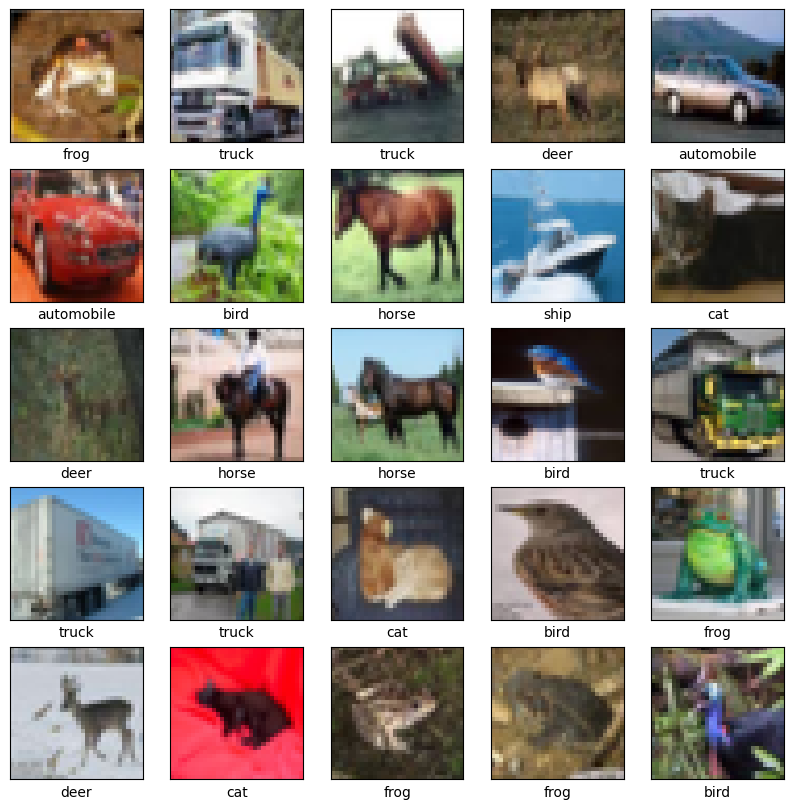

In [ ]:
# Set Label names in a list
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot training images with their corresponding label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [ ]:
# Build CNN
model = models.Sequential()
# .Conv2D(Filters, Strides, activation, input_shape)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #(image_height, image_width, color_channels)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten()) #Flattens the multidimensional information into a one dimensional vector that can be used to make predictions with.
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)        

In [ ]:
# Compile CNN
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train CNN
history = model.fit(train_images, train_labels, epochs=5,
                     validation_split = .2)

Epoch 1/5
1250/1250 [==============================] - 235s 185ms/step - loss: 1.5118 - accuracy: 0.4450 - val_loss: 1.2270 - val_accuracy: 0.5590
Epoch 2/5
1250/1250 [==============================] - 233s 186ms/step - loss: 1.0306 - accuracy: 0.6356 - val_loss: 0.9792 - val_accuracy: 0.6534
Epoch 3/5
1250/1250 [==============================] - 226s 181ms/step - loss: 0.8315 - accuracy: 0.7075 - val_loss: 0.8352 - val_accuracy: 0.7043
Epoch 4/5
1250/1250 [==============================] - 230s 184ms/step - loss: 0.6999 - accuracy: 0.7563 - val_loss: 0.7505 - val_accuracy: 0.7402
Epoch 5/5
1250/1250 [==============================] - 219s 176ms/step - loss: 0.5941 - accuracy: 0.7927 - val_loss: 0.7442 - val_accuracy: 0.7453


313/313 - 12s - loss: 0.7688 - accuracy: 0.7405 - 12s/epoch - 39ms/step
0.7688443064689636 0.7404999732971191


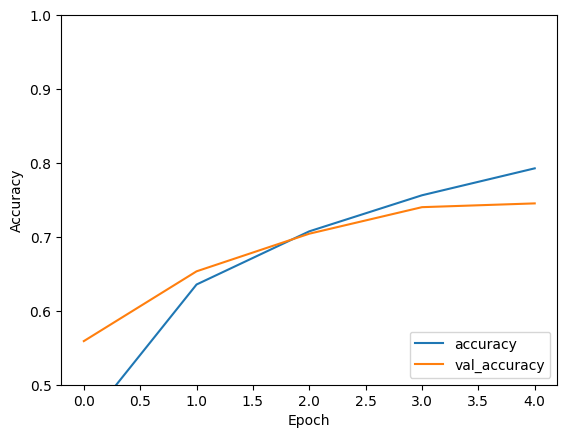

In [ ]:
# Plot accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Print Test set loss and accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_loss,test_acc)

In [ ]:
# Predict using the trained CNN
predictions = model.predict(test_images)

313/313 [==============================] - 13s 42ms/step


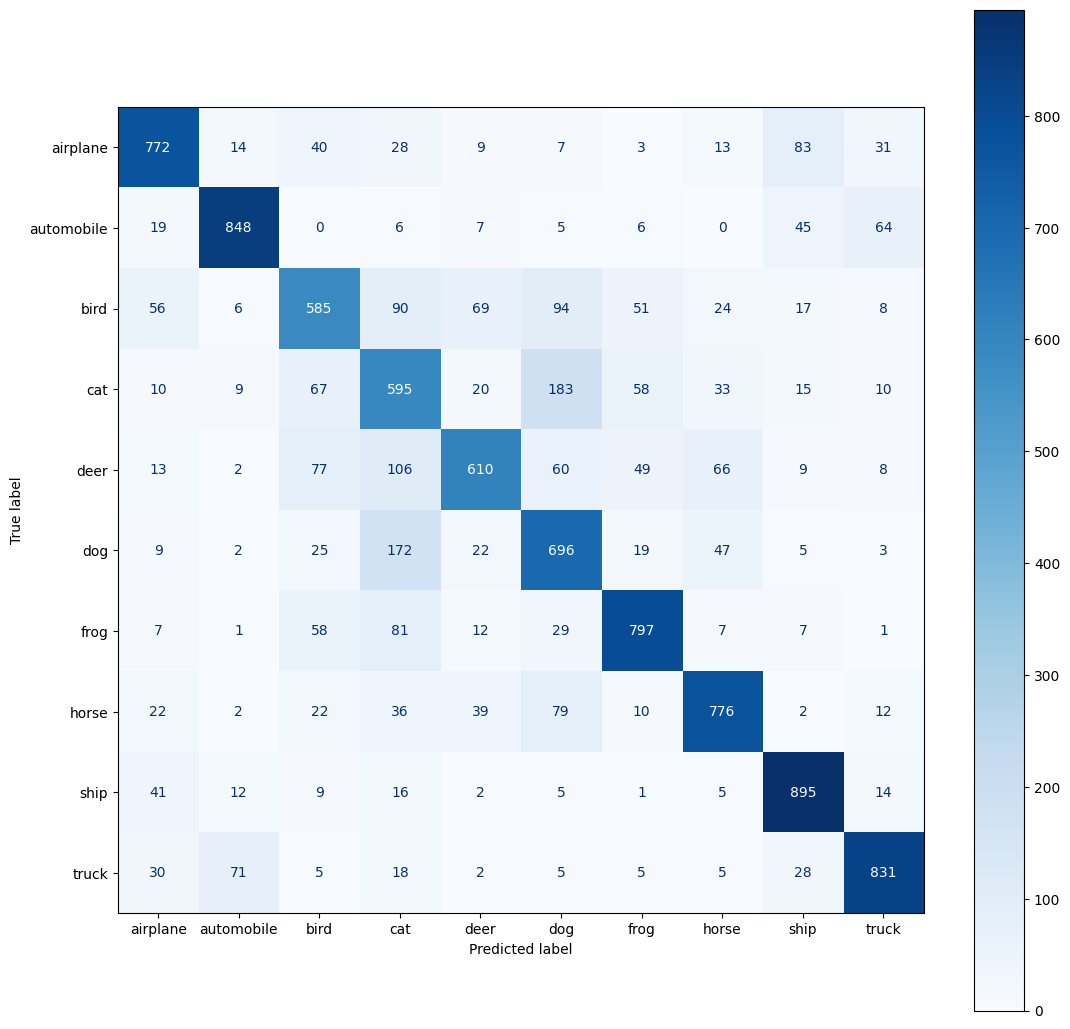

In [ ]:
# Graph a confusion matrix for evaluation
predictions_new = np.argmax(predictions,axis=1)
cm = confusion_matrix(test_labels, predictions_new)
cmd = ConfusionMatrixDisplay(cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(13,13)) # For changing the size of the plot
cmd.plot(ax=ax, cmap="Blues", values_format='.5g') # The .5g is for removing scientific notation in the confusion matrix

In [ ]:
# Create a classification report for evaluation
print(classification_report(test_labels,predictions_new))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1000
           1       0.88      0.85      0.86      1000
           2       0.66      0.58      0.62      1000
           3       0.52      0.59      0.55      1000
           4       0.77      0.61      0.68      1000
           5       0.60      0.70      0.64      1000
           6       0.80      0.80      0.80      1000
           7       0.80      0.78      0.79      1000
           8       0.81      0.90      0.85      1000
           9       0.85      0.83      0.84      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000

